In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

To get started, here are the references for the data we use for some examples: 

- "Global air quality data provided by the World Health Organization" | [Source: WHO](https://www.who.int/data/gho/data/themes/air-pollution/who-air-quality-database)

- "WHO regional groupings" by income | [Source: WHO](https://cdn.who.int/media/docs/default-source/air-pollution-documents/air-quality-and-health/country-groupings-database-2022.pdf)

Let's load the dataset and have a first look:

In [5]:
who_air_data = pd.read_csv(data_folder+'who_aap_2021_v9_11august2022.csv', sep=';', decimal=',')
who_air_data.head() # prints the first 5 rows, useful to check what the dataframe looks like

,WHO Region,ISO3,WHO Country Name,City or Locality,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference,Number and type of monitoring stations,Version of the database
0,Eastern Mediterranean Region,AFG,Afghanistan,Kabul,2019,119.77,NaN,NaN,18.0,NaN,NaN,"U.S. Department of State, United States Enviro...",NaN,2022
1,European Region,ALB,Albania,Durres,2015,NaN,17.65,26.63,NaN,NaN,83.961187,European Environment Agency (downloaded in 2021),NaN,2022
2,European Region,ALB,Albania,Durres,2016,14.32,24.56,24.78,NaN,NaN,87.932605,European Environment Agency (downloaded in 2021),NaN,2022
3,European Region,ALB,Albania,Elbasan,2015,NaN,NaN,23.96,NaN,NaN,97.853881,European Environment Agency (downloaded in 2021),NaN,2022
4,European Region,ALB,Albania,Elbasan,2016,NaN,NaN,26.26,NaN,NaN,96.049636,European Environment Agency (downloaded in 2021),NaN,2022


In [6]:
# It's often useful to print the list of column names:
print(who_air_data.columns) 

Index(['WHO Region', 'ISO3', 'WHO Country Name', 'City or Locality',
       'Measurement Year', 'PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)',
       'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)',
       'NO2 temporal coverage (%)', 'Reference',
       'Number and type of monitoring stations', 'Version of the database'],
      dtype='object')


In [49]:
who_air_data = who_air_data.replace('Iran (Islamic Republic of)', 'Iran')
who_air_data = who_air_data.replace('United States of America','USA')

In [7]:
who_region_income = pd.read_csv(data_folder+'who_country_income_ratings.csv', sep=';')
who_region_income.head()
# "head()" prints the first 5 rows - useful to check what a dataframe looks like

,WHO Country Name,WHO Region,World Bank ranking of income 2019
0,Afghanistan,Eastern Mediterranean,low
1,Albania,European,upper middle
2,Algeria,African,lower middle
3,Andorra,European,high
4,Angola,African,lower middle


In [8]:
print(who_region_income.columns) 

Index(['WHO Country Name', 'WHO Region', 'World Bank ranking of income 2019'], dtype='object')


Here's a basic first plot - a bar chart:

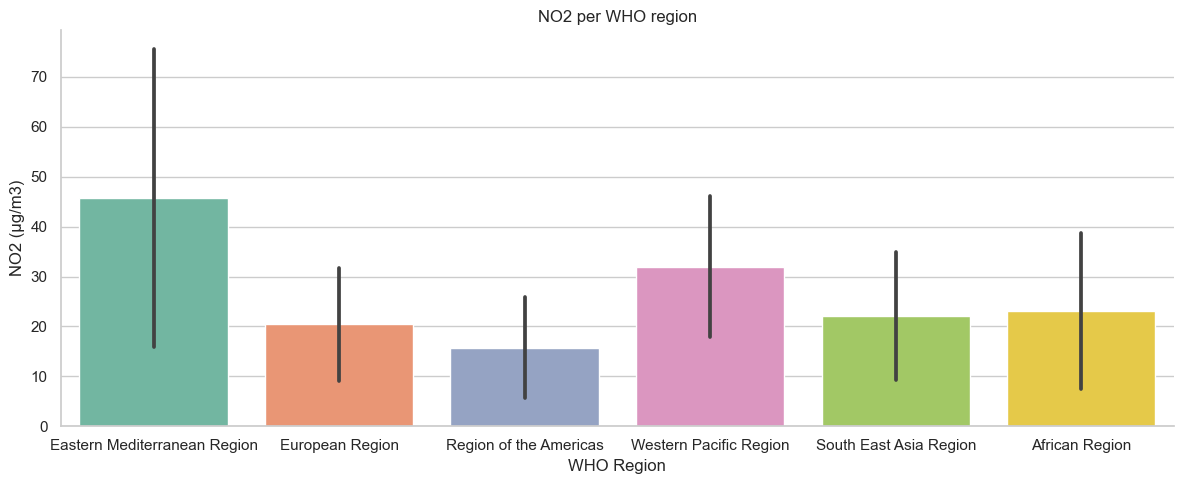

In [8]:
sns.set_palette(my_cat_palette)
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
sns.barplot(data=who_air_data, x="WHO Region", y="NO2 (μg/m3)", errorbar="sd")
plt.title('NO2 per WHO region')
sns.despine()
plt.tight_layout()
plt.xlabel('WHO Region')
plt.ylabel('NO2 (μg/m3)')
plt.show()

Here's another example that uses [geopandas](https://geopandas.org/) to easily integrate a map:

In [9]:
import geopandas as gpd
# With conda you can install it with: conda install -c conda-forge geopandas
# If you want to use pip instead check that dependencies can be installed as well,
# see: https://geopandas.org/en/stable/getting_started/install.html

This library also comes with basic geo-dataframes, such as the world map. Let's have a look:

In [10]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

C:\Users\nimav\AppData\Local\Temp\ipykernel_11812\2260362665.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Note that this data also includes information on population and gdp.

Here's an example of merging the geo data with the WHO data:

In [12]:
who_air_data_mean_per_country = who_air_data.groupby(['ISO3'])[['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']].mean()
who_air_data_geo = gpd.GeoDataFrame(pd.merge(left=who_air_data_mean_per_country, right=countries[['iso_a3', 'geometry']], left_on='ISO3', right_on='iso_a3', how='left'))
who_air_data_mean_per_country.head()

,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3)
ISO3,,,
AFG,119.770,NaN,NaN
ALB,19.372,25.575000,20.325000
AND,NaN,25.701429,28.455714
ARE,45.426,120.739714,32.802222
ARG,10.185,26.010000,17.442500


Now we can plot it!

This example also illustrates further useful aspects, such as adding and modifying a colorbar.

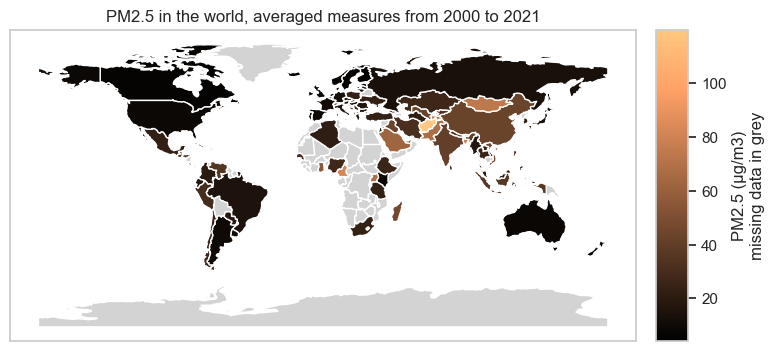

In [13]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Basic setup:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)

# Title, include the min and max year (since we averaged the measurements above):
plt.title('PM2.5 in the world, averaged measures from %d to %d' 
    % (who_air_data['Measurement Year'].min(), who_air_data['Measurement Year'].max()))

# Remove ticks, not needed for the world map here:
plt.xticks([])
plt.yticks([])

# Add a colorbar:
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Let's plot the world map in grey first, since not all countries have air measurements:
countries.plot(ax=ax, color='lightgrey')

# Now let's plot the air pollution data on top:
who_air_data_geo[['PM2.5 (μg/m3)', 'geometry']].plot(
    ax=ax, cax=cax, legend=True, column='PM2.5 (μg/m3)', cmap='copper')

# Modify the colorbar a bit to have a useful label:
cax.set_ylabel('PM2.5 (μg/m3)\nmissing data in grey', rotation=90)

plt.tight_layout()
plt.show()                                             

Sidenote: Don't like these colors? You can check out matplotlib's colormaps [here](https://matplotlib.org/2.0.2/users/colormaps.html) and seaborn's color palettes [here](https://seaborn.pydata.org/tutorial/color_palettes.html).

---

Explore the data further to find interesting aspects/patterns to visualize. 
Once you've made some interesting discoveries, try to optimize the visualizations. 
For example, experiment with different chart types and improve the details of the chart(s). 

See the intro lecture and the lectures on visual language, chart-level design and component-level design for input and inspiration.


To get you started, here are some questions you could examine:
- What is the relationship between the wealth of a country/region and its air pollution?
- Which countries/regions have the lowest/highest pollution levels? For each pollution type?
- Which cities have the lowest/highest pollution levels? For each pollution type?
- How has pollution developed (in specific cities) over time?
- What is the relationship of population size / country size and pollution?
- etc.

## What is the relationship between the wealth of a country/region and its air pollution?

In [11]:
#merged data set
merged_df = pd.merge(who_air_data, who_region_income, on='WHO Country Name',how='left')



In [12]:
import pandas as pd
merged_df= merged_df.dropna()

In [13]:
merged_df = merged_df.drop(columns=['ISO3',  'Reference', 'Number and type of monitoring stations', 'Version of the database','WHO Region_y'])
merged_df.rename(columns = {'WHO Region_x':'Region'}, inplace = True)


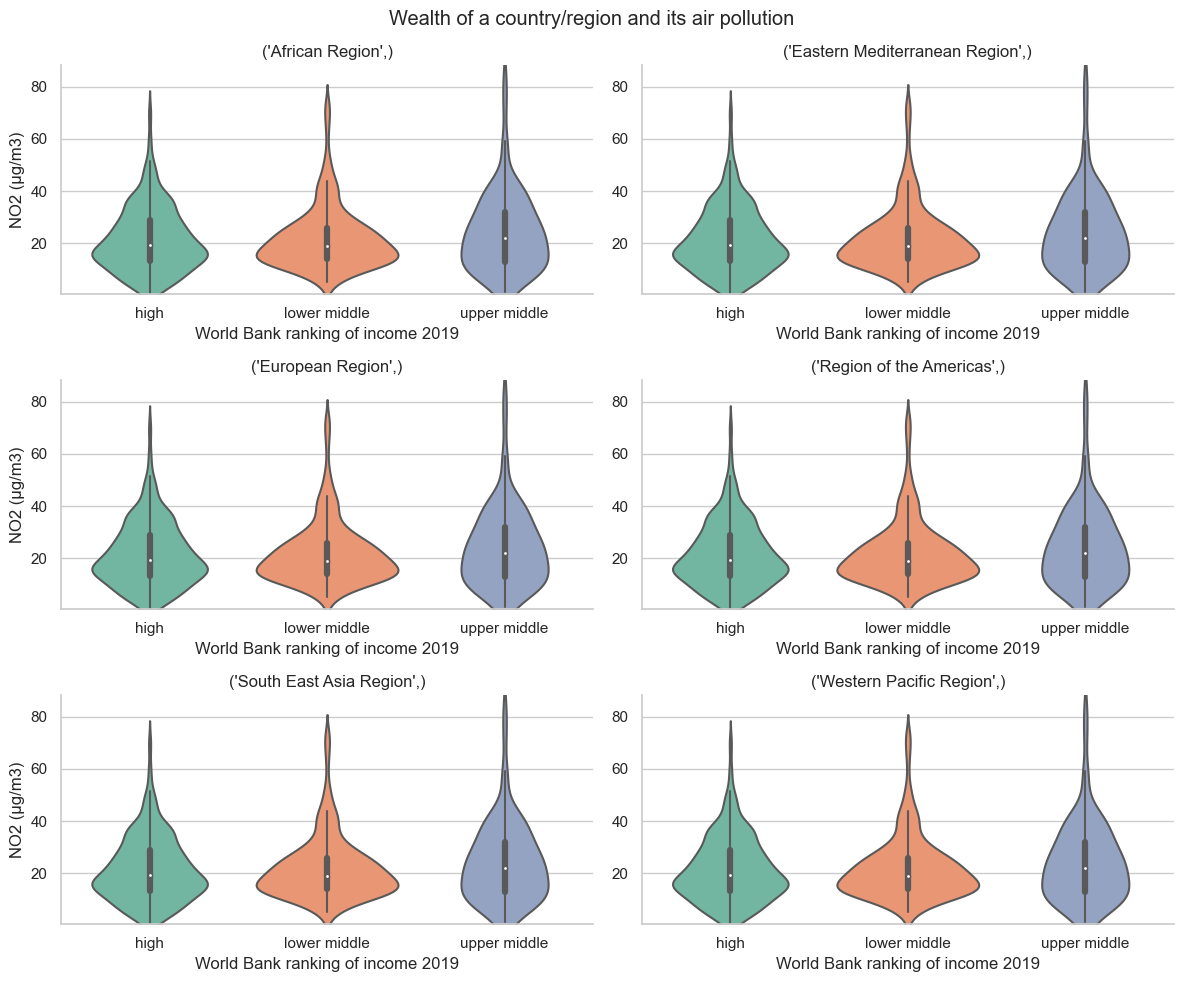

In [14]:
sns.set_style('whitegrid') 
plt.figure(figsize=(12,10)) 

# iterate over the data grouped by region:
subplot_idx = 0
for x, data in merged_df.groupby(['Region']):
    ax = plt.subplot(3, 2, subplot_idx+1) 
    plt.title(x)
    sns.violinplot(ax=ax, data=merged_df,  x='World Bank ranking of income 2019', y='NO2 (μg/m3)')
    plt.ylabel('NO2 (μg/m3)' if subplot_idx == 0 or subplot_idx == 2 or subplot_idx == 4  else '') 
    plt.ylim( (merged_df['NO2 (μg/m3)'].min()*0.95, merged_df['NO2 (μg/m3)'].max()*1.05) )
    subplot_idx += 1

plt.suptitle('Wealth of a country/region and its air pollution')
sns.despine() 
plt.tight_layout() 

## Which countries/regions have the lowest/highest pollution levels? For each pollution type?

## Countries with highest pollution

## Pollution type - NO2 (μg/m3)

<Axes: xlabel='WHO Country Name', ylabel='NO2 (μg/m3)'>

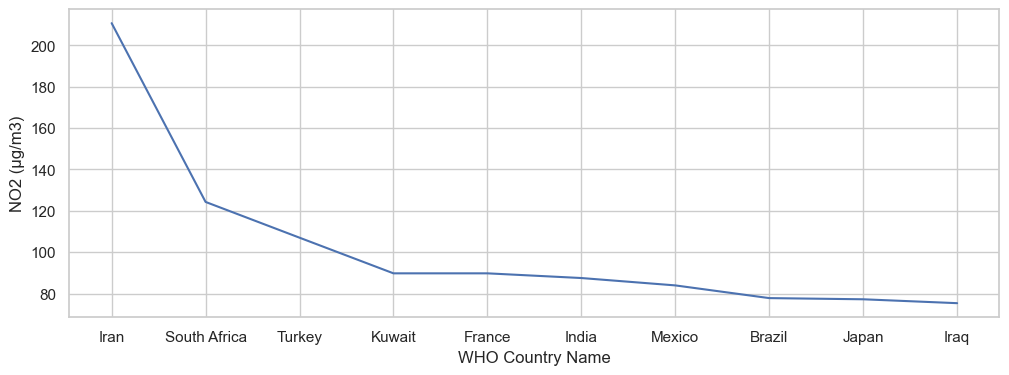

In [42]:

who_air_data_per_country = who_air_data.groupby(['WHO Country Name'])[['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']].max()
who_air_data_per_country_sorted = who_air_data_per_country.sort_values('NO2 (μg/m3)', ascending=False)
NO2highestcountry = who_air_data_per_country_sorted.head(10)


plt.figure(figsize=(12,4)) 
sns.lineplot(data=NO2highestcountry, x="WHO Country Name", y="NO2 (μg/m3)")




## Pollution type - PM2.5 (μg/m3)

<Axes: xlabel='WHO Country Name', ylabel='PM2.5 (μg/m3)'>

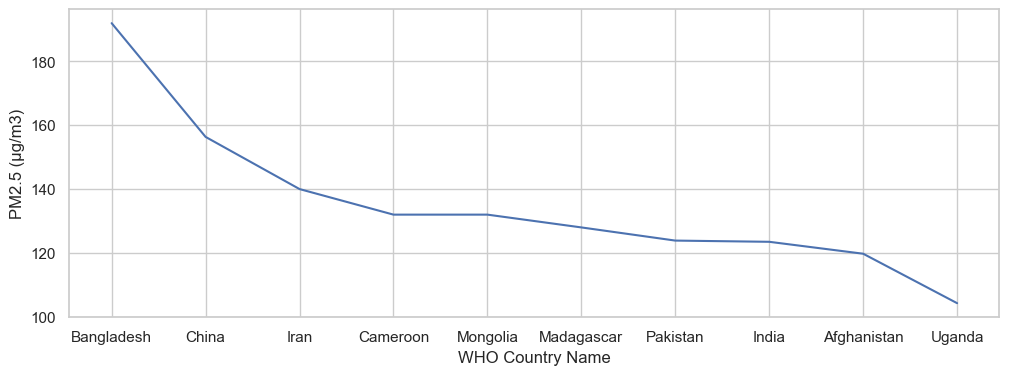

In [43]:
who_air_data_per_country_sorted_pm25 = who_air_data_per_country.sort_values('PM2.5 (μg/m3)', ascending=False)
PM25highestcountry = who_air_data_per_country_sorted_pm25.head(10)
PM25highestcountry = PM25highestcountry.copy()
PM25highestcountry['PollutionType'] = 'PM2.5'
plt.figure(figsize=(12,4)) 
sns.lineplot(data=PM25highestcountry, x="WHO Country Name", y="PM2.5 (μg/m3)")


## Pollution type - PM10 (μg/m3

<Axes: xlabel='WHO Country Name', ylabel='PM10 (μg/m3)'>

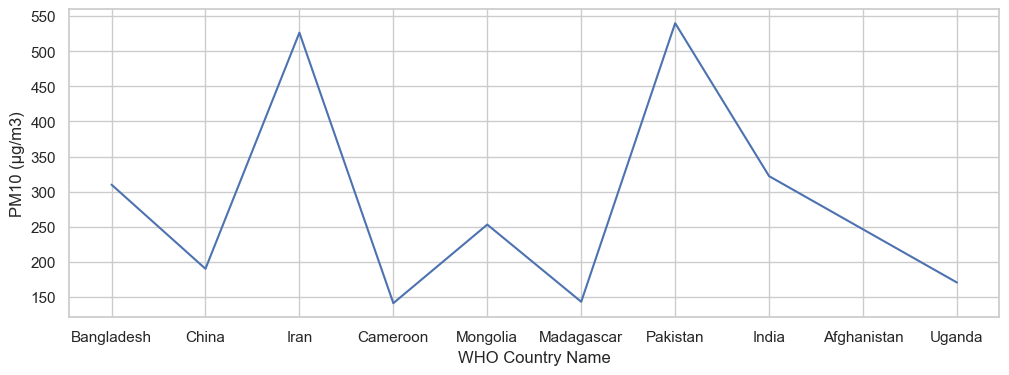

In [45]:

who_air_data_per_country_sorted_pm10 = who_air_data_per_country.sort_values('PM10 (μg/m3)', ascending=False)
PM10highestcountry = who_air_data_per_country_sorted_pm10.head(10)
PM10highestcountry = PM10highestcountry.copy()
PM10highestcountry['PollutionType'] = 'PM10'

plt.figure(figsize=(12,4)) 
sns.lineplot(data=PM25highestcountry, x="WHO Country Name", y="PM10 (μg/m3)")




## Countries with lowest pollution

## Pollution type - NO2 (μg/m3)

<Axes: xlabel='WHO Country Name', ylabel='NO2 (μg/m3)'>

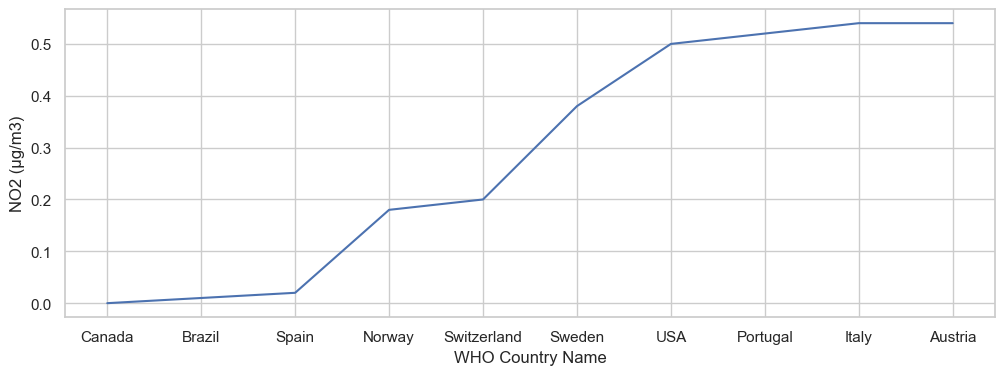

In [50]:
#countries with lowest pollution 
who_air_data_per_country = who_air_data.groupby(['WHO Country Name'])[['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']].min()
who_air_data_per_country_sorted = who_air_data_per_country.sort_values('NO2 (μg/m3)', ascending=True)


plt.figure(figsize=(12,4)) 
sns.lineplot(data=who_air_data_per_country_sorted.head(10), x="WHO Country Name", y="NO2 (μg/m3)" )


## Pollution type - PM2.5 (μg/m3)

<Axes: xlabel='WHO Country Name', ylabel='PM2.5 (μg/m3)'>

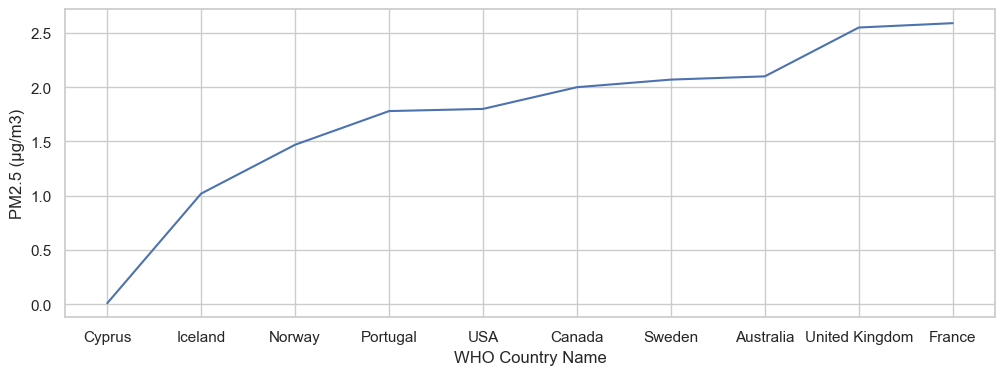

In [51]:
Low_poll_per_country_sorted_pm25 = who_air_data_per_country.sort_values('PM2.5 (μg/m3)', ascending=True)


plt.figure(figsize=(12,4)) 
sns.lineplot(data=Low_poll_per_country_sorted_pm25.head(10), x="WHO Country Name", y="PM2.5 (μg/m3)" )

## Pollution type - PM10 (μg/m3)

<Axes: xlabel='WHO Country Name', ylabel='PM10 (μg/m3)'>

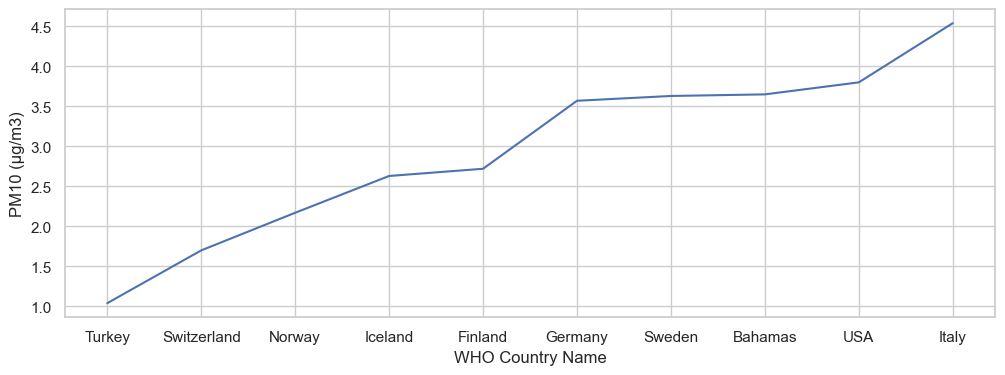

In [52]:
Low_poll_per_country_sorted_pm10 = who_air_data_per_country.sort_values('PM10 (μg/m3)', ascending=True)


plt.figure(figsize=(12,4)) 
sns.lineplot(data=Low_poll_per_country_sorted_pm10.head(10), x="WHO Country Name", y="PM10 (μg/m3)" )

# Which cities have the lowest/highest pollution levels? For each pollution type?

In [24]:
#CITIES with lowest pollution 
low_poll_city = who_air_data.groupby(['City or Locality'])[['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']].min()
low_poll_city_sorted_no2 = low_poll_city.sort_values('NO2 (μg/m3)', ascending=True)
low_poll_city_sorted_no2.head(10)

low_poll_city_sorted_pm25 = low_poll_city.sort_values('PM2.5 (μg/m3)', ascending=True)
low_poll_city_sorted_pm25.head(10)

low_poll_city_sorted_pm10 = low_poll_city.sort_values('PM10 (μg/m3)', ascending=True)
low_poll_city_sorted_pm10.head(10)

,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3)
City or Locality,,,
Sirnak,NaN,1.04,NaN
Jungfraujoch,NaN,1.70,0.20
Todalen,1.47,2.17,0.35
Suðurnesjabær,2.22,2.63,1.95
Muonio,NaN,2.72,0.64
Garmisch-Partenkirchen,NaN,3.57,9.37
Bredkalen,2.07,3.63,0.48
Nassau,3.20,3.65,NaN
Central Mckenzie,1.80,3.80,2.10


In [25]:
#CITIES with highest pollution 
high_poll_city = who_air_data.groupby(['City or Locality'])[['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']].max()
high_poll_city_sorted_no2 = low_poll_city.sort_values('NO2 (μg/m3)', ascending=False)
high_poll_city_sorted_no2.head(10)

high_poll_city_sorted_pm25 = low_poll_city.sort_values('PM2.5 (μg/m3)', ascending=False)
high_poll_city_sorted_pm25.head(10)

high_poll_city_sorted_pm10 = low_poll_city.sort_values('PM10 (μg/m3)', ascending=False)
high_poll_city_sorted_pm10.head(10)

,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3)
City or Locality,,,
Peshawar,79.48,540.00,NaN
Zabol,29.45,526.50,NaN
Rawalpindi,107.00,448.00,NaN
Basra,NaN,365.10,NaN
Al Jubail,NaN,359.00,NaN
Hamad Town,65.52,317.88,NaN
Jharia,NaN,280.00,35.0
Boshehr,NaN,255.20,NaN
Ras Hayan,43.92,250.42,NaN


In [26]:
who_air_data.head()

,WHO Region,ISO3,WHO Country Name,City or Locality,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference,Number and type of monitoring stations,Version of the database
0,Eastern Mediterranean Region,AFG,Afghanistan,Kabul,2019,119.77,NaN,NaN,18.0,NaN,NaN,"U.S. Department of State, United States Enviro...",NaN,2022
1,European Region,ALB,Albania,Durres,2015,NaN,17.65,26.63,NaN,NaN,83.961187,European Environment Agency (downloaded in 2021),NaN,2022
2,European Region,ALB,Albania,Durres,2016,14.32,24.56,24.78,NaN,NaN,87.932605,European Environment Agency (downloaded in 2021),NaN,2022
3,European Region,ALB,Albania,Elbasan,2015,NaN,NaN,23.96,NaN,NaN,97.853881,European Environment Agency (downloaded in 2021),NaN,2022
4,European Region,ALB,Albania,Elbasan,2016,NaN,NaN,26.26,NaN,NaN,96.049636,European Environment Agency (downloaded in 2021),NaN,2022


## How has pollution developed (in specific cities) over time?

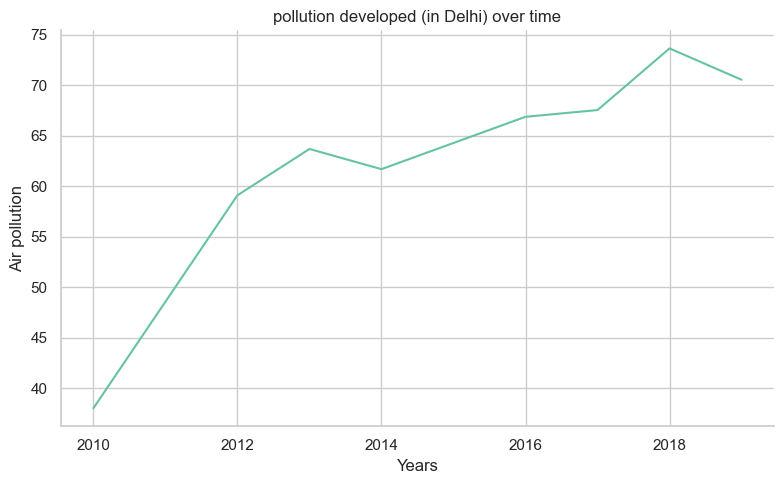

In [27]:
#How has pollution developed (in specific cities) over time?
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
#sns.lineplot(data=who_air_data.groupby()., x="Measurement Year", y="NO2 (μg/m3)") # general trend

delhi_pollution = who_air_data[who_air_data['City or Locality'] == 'Delhi']
sns.lineplot(data=delhi_pollution, x="Measurement Year", y="NO2 (μg/m3)")
plt.title('pollution developed (in Delhi) over time')
plt.xlabel("Years")
plt.ylabel("Air pollution")
sns.despine()
plt.tight_layout()

---

Enough about air pollution? Here's the second task for Part 1:

👉 **TODO 1.2:** Find another dataset and explore it as well (e.g. see the list of data sources at the top of this notebook). 

For inspiration, consider these prompts for what you could focus on here: 
- Can you tell a "data story" with 3-4 visualizations, plus connecting text explanations?
- Can you combine two datasets to allow for interesting new perspectives?
- Can you create an educational infovis example yourself? E.g. by showing the same data in 3-4 different chart types and discussing their pros and cons for this specific dataset.




## I am using the F1 racing data since 1950-2023. There are different datasets used throughout. 

In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("C:/Users/nimav/Downloads/F1Data/drivers.csv").replace({'\\N': np.nan})

In [30]:
df.head() # the drivers dataset

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [31]:
#dropping columns which wont be useful
df = df.drop(labels = ['number','code', 'url'], axis = 1)


In [32]:
# The 5 youngest drivers in F1 racing as of today
drivers_theyoungest = df.sort_values(by='dob', ascending=False)[:5]
drivers_theyoungest

,driverId,driverRef,forename,surname,dob,nationality
855,857,piastri,Oscar,Piastri,2001-04-06,Australian
856,858,sargeant,Logan,Sargeant,2000-12-31,American
850,852,tsunoda,Yuki,Tsunoda,2000-05-11,Japanese
844,846,norris,Lando,Norris,1999-11-13,British
853,855,zhou,Guanyu,Zhou,1999-05-30,Chinese


## Top 10 common nationalities of F1 drivers

In [33]:
#top 10 most common nationalities in F1 history 
nationality_counts = df.groupby("nationality").size()
sorted_nationalities = nationality_counts.sort_values(ascending=False)

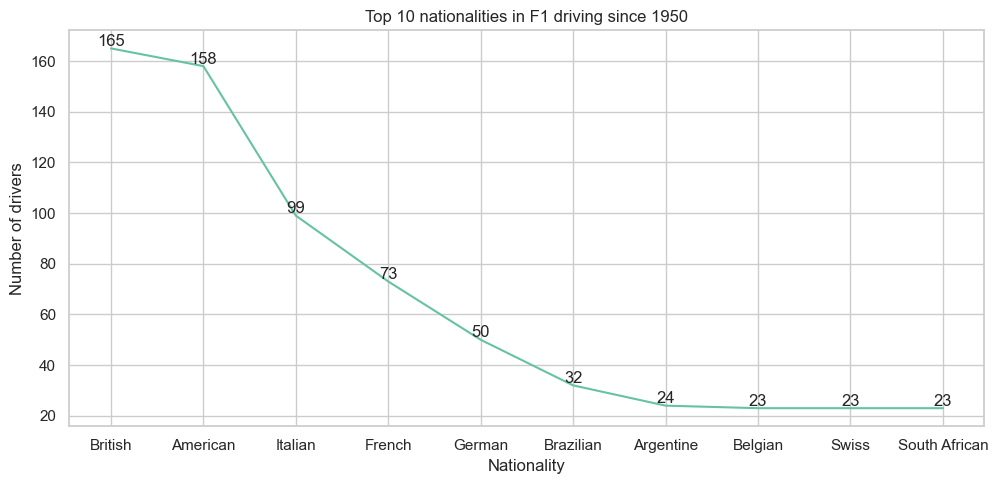

In [34]:
#driver_nationality = df.groupby('nationality')['nationality'].count().sort_values(ascending = False).reset_index(name = 'number of drivers')
top10nations = df['nationality'].value_counts()[:10]
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
#ax = sns.barplot(data=driver_nationality.head(10), x="nationality", y="number of drivers", errorbar="sd")
ax = sns.lineplot(x=top10nations.index, y=top10nations.values)
plt.title('Top 10 nationalities in F1 driving since 1950')
plt.tight_layout()
plt.xlabel('Nationality')
plt.ylabel('Number of drivers')

for i, v in enumerate(top10nations):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)

plt.show()

In [35]:
#circuits 
df_circuits = pd.read_csv('C:/Users/nimav/Downloads/F1Data/circuits.csv')


In [36]:
#races
df_races = pd.read_csv('C:/Users/nimav/Downloads/F1Data/races.csv') 
df_races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


## Most popular circuits based on number of times races were held 

In [37]:
#most popular circuts in order
counts = df_races['name'].value_counts()
circuits_pop = pd.DataFrame({'circuitId': counts.index, 'number of times': counts.values})


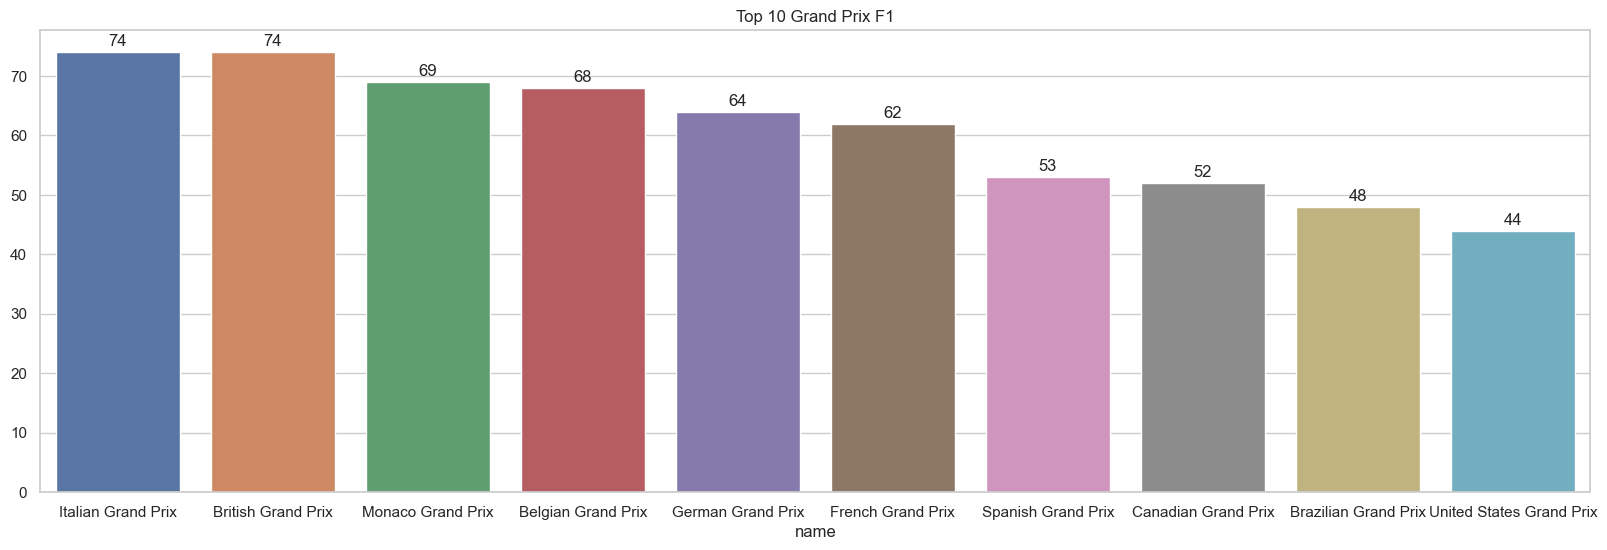

In [38]:
top_10 = df_races['name'].value_counts()[:10]

#visualization
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=top_10.index, y=top_10.values)
ax.set_title("Top 10 Grand Prix F1")


for i, v in enumerate(top_10):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)


plt.show()

In [39]:
laptimes = pd.read_csv('C:/Users/nimav/Downloads/F1Data/lap_times.csv')


In [40]:
#merging laptimes with races
df_combined = pd.merge(laptimes, df_races, on='raceId', how='left')



In [41]:
df_combined = df_combined[['raceId','driverId','time_x','year','circuitId','name','date']]

In [42]:
#merging df_combined with drivers and circuits
df_combined.rename(columns = {'time_x':'lap_time', 'name':'circuit_name'}, inplace = True)
df_combined = pd.merge(df_combined, df, on='driverId', how='left')
df_combined = pd.merge(df_combined, df_circuits, on='circuitId', how='left')


In [43]:
df_combined = df_combined[['raceId', 'driverId', 'lap_time', 'year', 'circuitId', 'circuit_name',
       'date', 'driverRef', 'forename', 'surname', 'dob', 'nationality',
       'circuitRef', 'name', 'location', 'country']]


### Races held per season since 1950

In [44]:
#races per season 
races_per_season = df_races.groupby('year')['raceId'].nunique()

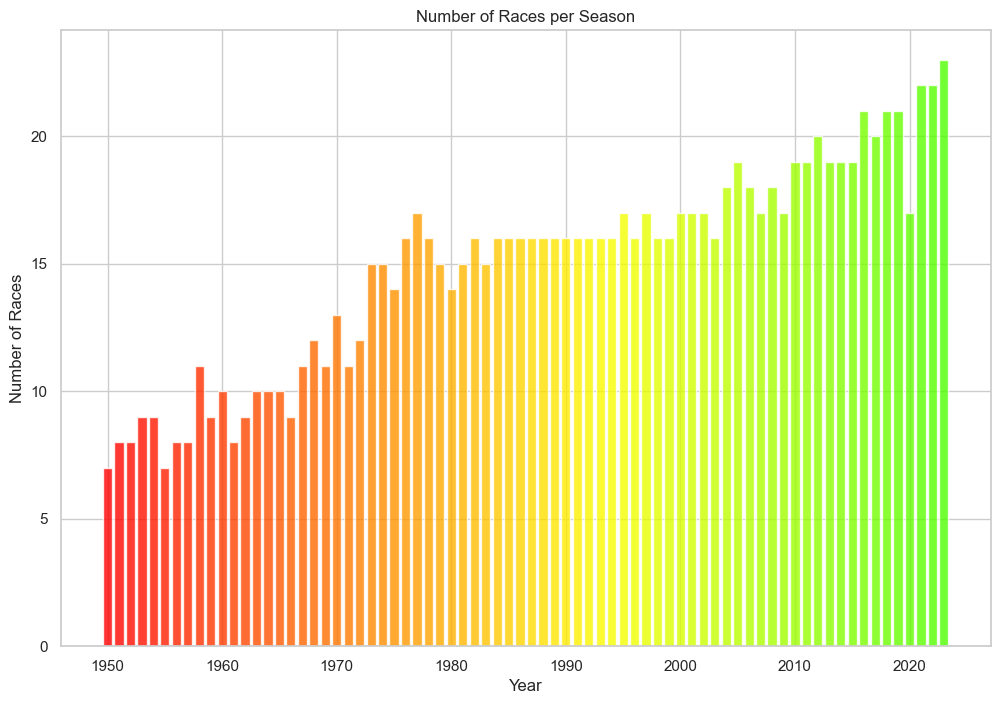

In [45]:
plt.figure(figsize=(12, 8))
colors = plt.cm.hsv(range(len(races_per_season)))
plt.bar(races_per_season.index, races_per_season.values, color=colors, alpha=0.8)

plt.title('Number of Races per Season')
plt.xlabel('Year')
plt.ylabel('Number of Races')

plt.show()

In [46]:
results = pd.read_csv('C:/Users/nimav/Downloads/F1Data/results.csv')


## Most number of wins for a driver in the 2022 season

In [47]:
winner = pd.merge(df_races, results,on='raceId')
winner.head()
completed_races_dataf = winner[winner['year'] == 2022]
completed_races_dataf = completed_races_dataf[completed_races_dataf['positionOrder'] == 1]


In [48]:
# grouping by driver, count the number of wins
wins_by_season_driver = completed_races_dataf.groupby(['driverId'])['positionOrder'].count().sort_values(ascending = False).reset_index(name = 'wins')
wins_by_season_driver.head()
mostwinsdriver2022 = pd.merge(wins_by_season_driver, df, on='driverId')



Text(0, 0.5, 'Number of wins')

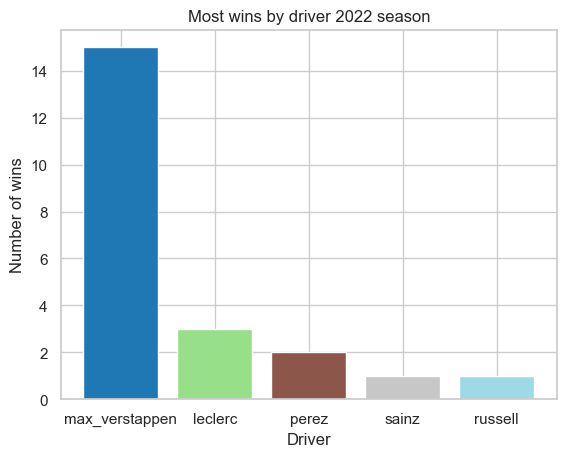

In [49]:
colors = plt.cm.tab20(np.linspace(0, 1, len(mostwinsdriver2022)))
plt.bar(mostwinsdriver2022['driverRef'], mostwinsdriver2022['wins'], color=colors)

plt.title('Most wins by driver 2022 season')
plt.xlabel('Driver')
plt.ylabel('Number of wins')

## Merging datasets for comparing different plots

In [50]:
df1 = pd.merge(results, df_races, on ='raceId')
df_race= pd.merge(df1, df, on = 'driverId')

dropdata = ['laps', 'milliseconds', 'fastestLap', 'fastestLapTime', 'fastestLapSpeed', 'statusId', 'time_x', 'time_y', 'positionOrder']
df_race = df_race.drop(columns=dropdata)
df_race = df_race.drop(columns=['position',  'positionText', 'sprint_date', 'sprint_time', 'driverRef', 'nationality', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'quali_date', 'quali_time', 'fp3_date', 'fp3_time'])



In [51]:
#Change data type from string to datetime
df_race['dob'] = pd.to_datetime(df_race['dob'])
df_race['date'] = pd.to_datetime(df_race['date'])

In [52]:
#Add age column to dataframe
from datetime import datetime
dates = datetime.today()-df_race['dob']
age = dates.dt.days/365
df_race['age'] = round(age)
df_race.head()

,resultId,raceId,driverId,constructorId,number,grid,points,rank,year,round,circuitId,name,date,url,forename,surname,dob,age
0,1,18,1,1,22,1,10.0,2,2008,1,1,Australian Grand Prix,2008-03-16,http://en.wikipedia.org/wiki/2008_Australian_G...,Lewis,Hamilton,1985-01-07,38.0
1,27,19,1,1,22,9,4.0,3,2008,2,2,Malaysian Grand Prix,2008-03-23,http://en.wikipedia.org/wiki/2008_Malaysian_Gr...,Lewis,Hamilton,1985-01-07,38.0
2,57,20,1,1,22,3,0.0,19,2008,3,3,Bahrain Grand Prix,2008-04-06,http://en.wikipedia.org/wiki/2008_Bahrain_Gran...,Lewis,Hamilton,1985-01-07,38.0
3,69,21,1,1,22,5,6.0,3,2008,4,4,Spanish Grand Prix,2008-04-27,http://en.wikipedia.org/wiki/2008_Spanish_Gran...,Lewis,Hamilton,1985-01-07,38.0
4,90,22,1,1,22,3,8.0,2,2008,5,5,Turkish Grand Prix,2008-05-11,http://en.wikipedia.org/wiki/2008_Turkish_Gran...,Lewis,Hamilton,1985-01-07,38.0


In [53]:
# Filter the dataset for years 2018 to 2023
filtered_df = df_race[(df_race['year'] >= 2018) & (df_race['year'] <= 2023)]

# Group the filtered dataset by year and calculate the sum of points
grouped_df = filtered_df.groupby('year')['points'].sum().reset_index()



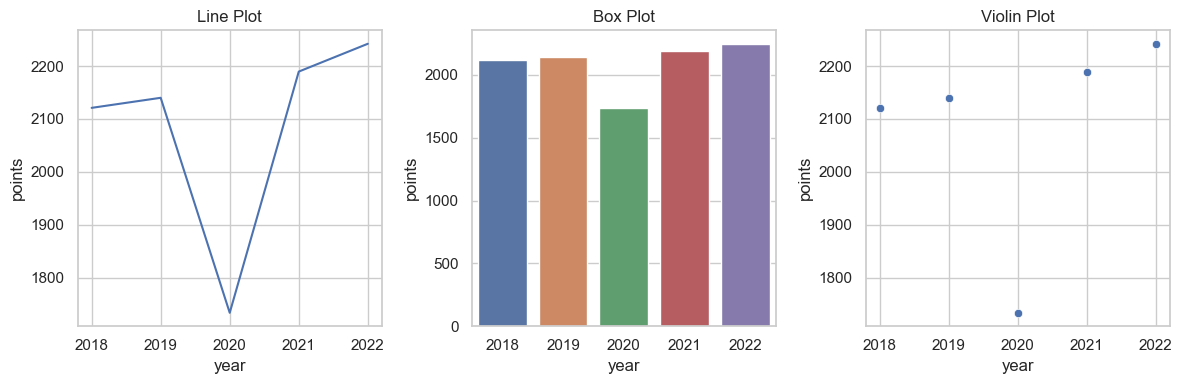

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Line plot
sns.lineplot(data=grouped_df, x="year", y="points", ax=axes[0])
axes[0].set_title("Line Plot")

# Box plot
sns.barplot(data=grouped_df, x="year", y="points", ax=axes[1])
axes[1].set_title("Box Plot")

# Violin plot
sns.scatterplot(data=grouped_df, x="year", y="points", ax=axes[2])
axes[2].set_title("Violin Plot")

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

In [55]:
df_race.head()

,resultId,raceId,driverId,constructorId,number,grid,points,rank,year,round,circuitId,name,date,url,forename,surname,dob,age
0,1,18,1,1,22,1,10.0,2,2008,1,1,Australian Grand Prix,2008-03-16,http://en.wikipedia.org/wiki/2008_Australian_G...,Lewis,Hamilton,1985-01-07,38.0
1,27,19,1,1,22,9,4.0,3,2008,2,2,Malaysian Grand Prix,2008-03-23,http://en.wikipedia.org/wiki/2008_Malaysian_Gr...,Lewis,Hamilton,1985-01-07,38.0
2,57,20,1,1,22,3,0.0,19,2008,3,3,Bahrain Grand Prix,2008-04-06,http://en.wikipedia.org/wiki/2008_Bahrain_Gran...,Lewis,Hamilton,1985-01-07,38.0
3,69,21,1,1,22,5,6.0,3,2008,4,4,Spanish Grand Prix,2008-04-27,http://en.wikipedia.org/wiki/2008_Spanish_Gran...,Lewis,Hamilton,1985-01-07,38.0
4,90,22,1,1,22,3,8.0,2,2008,5,5,Turkish Grand Prix,2008-05-11,http://en.wikipedia.org/wiki/2008_Turkish_Gran...,Lewis,Hamilton,1985-01-07,38.0


In [56]:
df_race = df_race.replace('\\N', np.nan)


In [57]:
df_race.describe()

,resultId,raceId,driverId,constructorId,grid,points,year,round,circuitId,date,dob,age
count,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840,25840,25840.000000
mean,12921.334327,531.425813,261.732082,48.628328,11.179063,1.877053,1990.251780,8.385991,23.486920,1990-10-11 06:32:19.318885504,1960-10-01 15:48:02.229102208,62.658746
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1950.000000,1.000000,1.000000,1950-05-13 00:00:00,1896-12-28 00:00:00,23.000000
25%,6460.750000,293.000000,56.000000,6.000000,5.000000,0.000000,1976.000000,4.000000,9.000000,1976-08-29 00:00:00,1945-01-01 00:00:00,44.000000
50%,12920.500000,514.000000,163.000000,25.000000,11.000000,0.000000,1990.000000,8.000000,18.000000,1990-10-21 00:00:00,1960-09-08 00:00:00,63.000000
75%,19380.250000,784.000000,360.000000,58.000000,17.000000,2.000000,2007.000000,12.000000,34.000000,2007-06-17 00:00:00,1979-10-17 00:00:00,78.000000
max,25845.000000,1096.000000,856.000000,214.000000,34.000000,50.000000,2022.000000,22.000000,79.000000,2022-11-20 00:00:00,2000-05-11 00:00:00,126.000000
std,7460.682031,299.440908,268.623016,59.732131,7.243725,4.169849,19.345632,4.958210,18.569371,NaN,NaN,21.732793


In [58]:
#driver standings 
standings = pd.read_csv('C:/Users/nimav/Downloads/F1Data/driver_standings.csv')
race_laps = pd.merge(standings, df_race, on ='raceId')
#race_laps.groupby('raceId','driverId')
race_laps = race_laps.drop(columns=['driverId_x','points_x'])
race_laps.rename(columns = {'driverId_y':'driverId', 'points_y':'points'}, inplace = True)

race_laps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836301 entries, 0 to 836300
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   driverStandingsId  836301 non-null  int64         
 1   raceId             836301 non-null  int64         
 2   position           836301 non-null  int64         
 3   positionText       836301 non-null  object        
 4   wins               836301 non-null  int64         
 5   resultId           836301 non-null  int64         
 6   driverId           836301 non-null  int64         
 7   constructorId      836301 non-null  int64         
 8   number             836060 non-null  object        
 9   grid               836301 non-null  int64         
 10  points             836301 non-null  float64       
 11  rank               170063 non-null  object        
 12  year               836301 non-null  int64         
 13  round              836301 non-null  int64   

In [59]:
filtered_df = race_laps[race_laps['year'] == 2022]


## Lets see how the age of the driver performs against the points they have earned

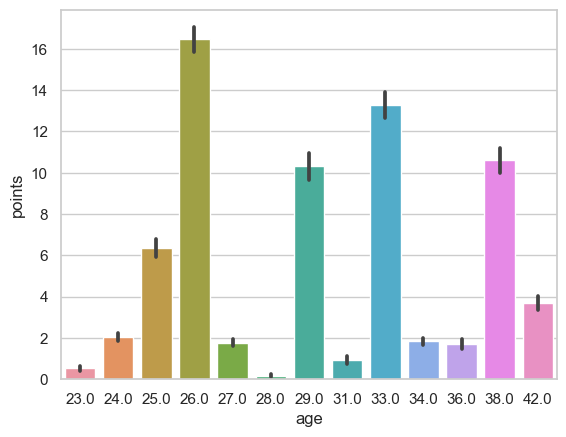

In [60]:
sns.barplot(data=filtered_df, x='age', y='points')
plt.show()

Most of the drivers are of the age 26. It is then followed by the ages of 33 and 29 and 38. This kind of implies that drivers competing in the F1 championship are as young as 23, then they achieve peak in the career at about 25-26. For whatever reason, there is a drop in the next few years and by the age of 30's, their game is better again. There a few drivers who took retirement from the sport and then came back, these can be seen the age group of late 30's.

## Points earned by constructor teams in 2022

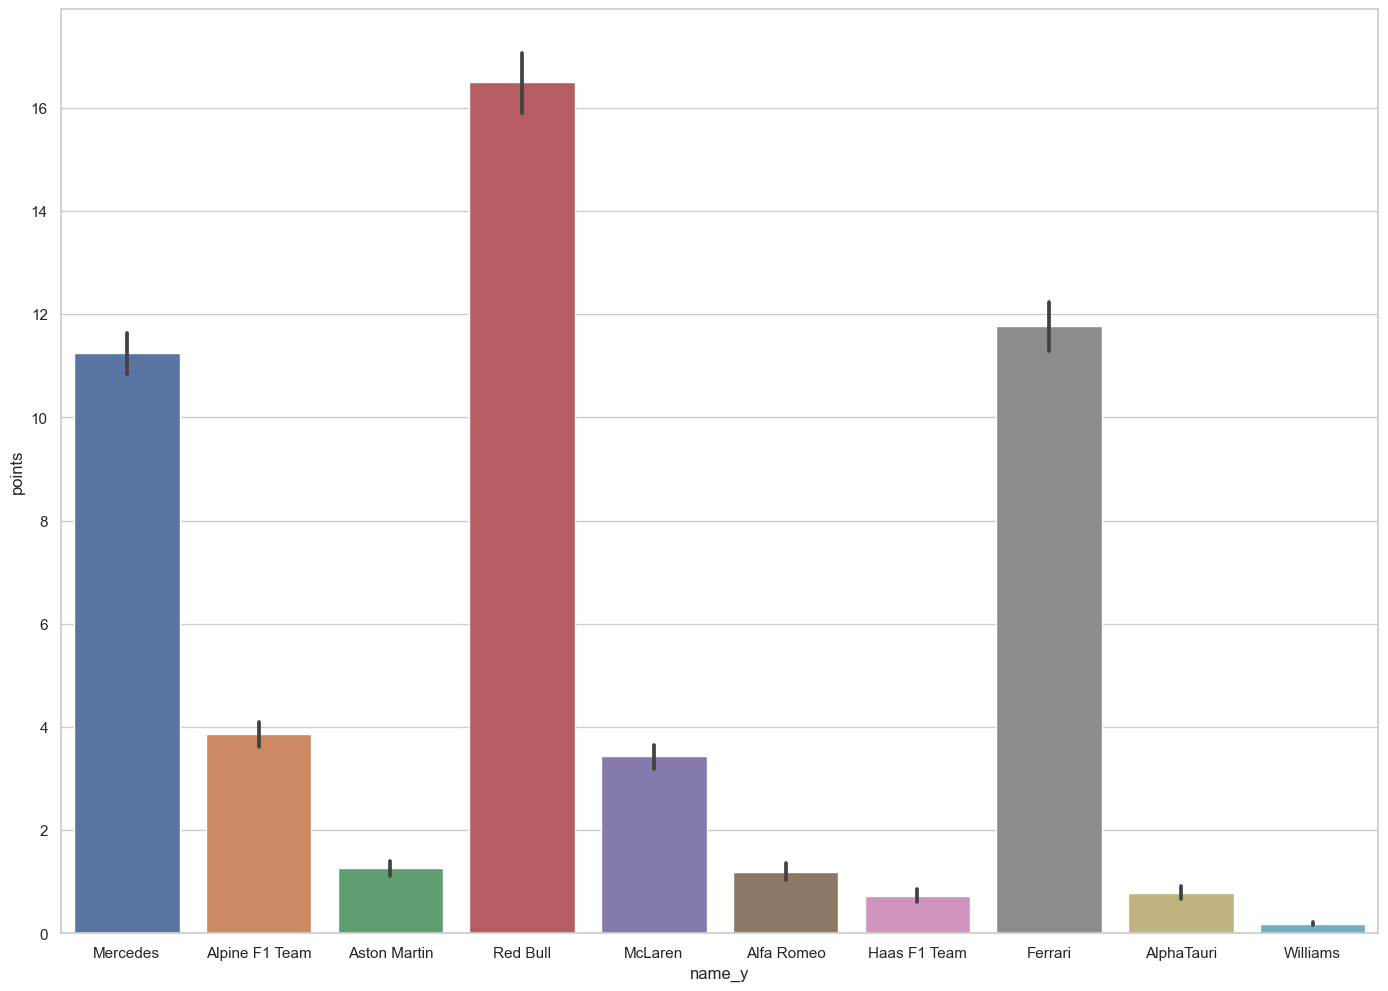

In [61]:
constructors = pd.read_csv('C:/Users/nimav/Downloads/F1Data/constructors.csv')
constructors_df = pd.merge(filtered_df, constructors, on ='constructorId')
constructors_df.head()

plt.figure(figsize=(17,12))
sns.barplot(data=constructors_df, x='name_y', y='points')
plt.show()


### We see a clear domination of 3 teams out of the 10. Red Bull being in the lead followed by Mercedes and Ferrari. 